In [1]:
import sys
sys.path.append('/mnt/disk05/note/workspaces/duxx')
from feature_selector import FeatureSelector
from unity import init_pkg as ini
import os
import json
from sklearn.linear_model import LogisticRegression
import scorecardpy as sc

% matplotlib inline

# 1.特征处理

## 1.1 新网特征处理

In [2]:
xwdf_list = []
for f in os.listdir('data/xw'):
    if 'xlsx' in f:
        print(f)
        each = ini.pd.read_excel('data/xw/'+f)
        xwdf_list.append(each)
xwtag = ini.pd.read_csv('data/tag/xw_tag_avli.csv')
xwbank = ini.pd.concat(xwdf_list)
xwbank = xwbank.reset_index(drop=True)

新网10月进件.xlsx
新网11月进件.xlsx
新网12月进件.xlsx
新网8月进件.xlsx
新网9月进件.xlsx


In [3]:
xwbank.head()

,ID,ENTER_SEQ_NO,CUST_NAME,ID_CARD_NO,ID_CARD_VALID_PERIOD_BEGIN_TM,ID_CARD_VALID_PERIOD_STOP_TM,MOBILE_NO,BANK_CARD_NO,GENDER,ETHNIC,BIRTH_DT,ISSUE_CERT_ORG,CERT_ADDR,CERT_ADDR_PROV,CERT_ADDR_CITY,RESDNT_SITU,RESDNT_ADDR,RESDNT_ADDR_PROV,RESDNT_ADDR_CITY,RESDNT_ADDR_REGION,HIGT_EDU_DEGREE,HIGT_DEGREE,CAREER_TYPE,INDV_MON_IN,CORP_NAME,INDUS_CLASS,CORP_ADDR_PROV,CORP_ADDR_CITY,CORP_ADDR_REGION,CORP_ADDR,MARRIAGE_STATUS,LINKMAN_NAME,LINKMAN_RELA,LINKMAN_TEL,IS_FARMER,NEW_CUST_ID,CRDT_PROD_CD,CRDT_BIZ_TYPE,CRDT_MODE,UNITE_LON_PROD_CD,UNITE_LON_PROD_NAME,INDENT_NO,LMT_TYPE,CRDT_LMT,CRDT_YEAR_INT_RATE,LON_AMT,LON_TERM,LON_BEGIN_DT,LON_STOP_DT,LON_YEAR_INT_RATE,REPAY_WAY,GUAR_WAY,RECV_CARD_NO,RECV_CARD_BANK,RECV_CARD_NAME,LON_USAGE,CRDT_INFO,CAR_LON_TX_INFO,OPER_INFO,CREATED_DATE,UPDATED_DATE,EDU_DEGREE,IS_HAVE_NCLOSE_CRDT_CARD,IS_HAVE_UNPAYOFF_INDV_LON,IS_HAVE_UNPAYOFF_OTHER_LON,IS_HAVE_UNPAYOFF_NORMAL_LON,IS_POLICE_INFO_NOT_EXIST,IS_POLICE_INFO_NOT_MATCH,IS_DISCREDIT_LIST,IS_FIVE_YEAR_BADLOAN_REC,IS_CURR_LON_OVDUE,IS_LOAN_MAXOVERDUE_3_CNT,IS_CRCARD_MAXOVERDUE_3_CNT,IS_M24_MAX_SUMOVDUE_6_CNT,IS_M1_CRDT_APPLY_10_CNT,IS_CR_CARD_LIMIT_OVER_30_TH,UNPAYOFF_LON_CNT_IS_BIG_2,IS_HAVE_OVDUE_M24_LON,IS_HAVE_OVDUE_M24_CRDT_CARD,IS_M24_MAX_SUMOVDUE_3_CNT,UNPAYOFF_OTHER_LON_CNT_IS_0_3,UNPAYOFF_OTHER_LON_CNT_IS_3_5,UNPAYOFF_OTHER_LON_CNT_IS_5_8,UNPAYOFF_OTHER_LON_CNT_IS_8_10,UNPAYOFF_OTHER_LON_CNT_IS_G_10,HAVE_BAL_CRDT_CARD_CNT_IS_0_3,HAVE_BAL_CRDT_CARD_CNT_IS_3_5,HAVE_BAL_CRDT_CARD_CNT_IS_5_8,HAVE_BAL_CRDT_CARD_CNT_IS_8_10,HAVE_BAL_CRDT_CARD_CNT_IS_G_10,IS_CR_CARD_LIMIT_OVER_100_TH,PERIOD_OF_LOAN,IS_CREDIT_AVAILABLE,BUSINESS_LICENSE_CODE,COMPANY_NAME
0,998a96a06d6dca14016d84a19a151b0d,PROPXWXM01156988833204510371,覃洪进,452223198809022552,2013-02-22,2023-02-22,18777275015,6236006610034810386,1,8,1988-09-02,柳州市公安局鱼峰分局,雒容镇南庆村水,NaN,NaN,NaN,广西柳州市鱼峰区雒容镇南庆村水闷屯55号,45.0,450200.0,450203.0,20.0,NaN,1,NaN,广西鹿寨农村商业银行股份有限公司,NaN,450000,450200,450223,广西壮族自治区柳州市鹿寨县鹿寨镇政军路58,NaN,李月嫦,0.0,1.370782e+10,NaN,12216302,F021009001001001,1,20,LHD0000008,消费贷好人贷A产品,U19A01080526234773EqVpy,1,280019.49,0.180,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""XA5509"":{""XA550902"":0,""XA550903"":0,""XA550901...","{""XA560219"":"""",""XA560209"":"""",""XA560105"":0,""XA5...",NaN,2019-10-01 08:04:06,2019-10-01 08:04:06,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,3.0,NaN,NaN
1,998a96a06d6dca14016d84a233931b89,PROPXWXM01156988837148110399,许文俊,44018219951225127X,2012-08-22,2022-08-22,18902338743,,1,1,1995-12-25,广州市公安局花都分局,广州市花都区新华街清?村三队向南新屋8号,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0,NaN,NaN,NaN,NaN,NaN,44,440100,440114,新雅街清布村三队大窝布小学,NaN,NaN,NaN,NaN,NaN,10009643376,F021002001019001,1,20,LHD0000014,消费贷好人贷D产品,U19A010806083027393kVFO,1,3100.00,0.216,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""XA5509"":{""XA550902"":0,""XA550903"":0,""XA550901...","{""XA560219"":"""",""XA560209"":"""",""XA560105"":0,""XA5...",NaN,2019-10-01 08:04:45,2019-10-01 08:04:45,4.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,3.0,NaN,NaN
2,998a96a06d6dca14016d85ca39bf0fa7,PROPXWXM01156990777173010004,叶品材,450881199610105739,2014-11-04,2024-11-04,15817850808,,1,1,1996-10-10,桂平市公安局,广西桂平市大洋镇义江村河塘屯015号,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10009645300,F021002001019001,1,20,LHD0000014,消费贷好人贷D产品,U19A01132925355422aqxY3,1,6800.00,0.198,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""XA5509"":{""XA550902"":0,""XA550903"":0,""XA550901...","{""XA560219"":"""",""XA560209"":"""",""XA560105"":0,""XA5...",NaN,2019-10-01 13:28:05,2019-10-01 13:28:05,4.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,3.0,NaN,NaN
3,998a96a06d6dca14016d85ee633c1b03,PROPXWXM01156991014184010083,吕洪涛,23080219741101031X,2007-12-26,2027-12-26,13846188113,6217230904001305969,1,1,1974-11-01,佳木斯市公安局向阳分局,黑龙江省佳木斯市向

In [4]:
xwbank = xwbank[['ID_CARD_NO','CRDT_INFO']]
xwbank = xwbank.sort_values(by=['ID_CARD_NO','CRDT_INFO'])
xwbank = xwbank.drop_duplicates(subset=['ID_CARD_NO'],keep='first')
xwtag = xwtag.drop_duplicates('cert_no')
xwmain = xwbank.merge(xwtag.rename({'cert_no':'ID_CARD_NO'},axis=1)[['ID_CARD_NO','tag']])

In [5]:
xwfea = ini.pd.io.json.json_normalize(xwmain['CRDT_INFO'].fillna('{}').apply(json.loads))
xwfea = xwfea.loc[:,xwfea.columns.str.contains('XA5508|XA5504|XA5513|XA5515')]

In [6]:
xwfea.head()

,XA5504.XA550401,XA5504.XA550402,XA5504.XA550403,XA5504.XA550404,XA5508.XA550801,XA5508.XA550802,XA5508.XA550803,XA5508.XA550804,XA5513.XA551301,XA5513.XA551302,XA5513.XA551303,XA5513.XA551304,XA5515.XA551501,XA5515.XA551502,XA5515.XA551503,XA5515.XA551504,XA5515.XA551505,XA5515.XA551506,XA5515.XA551507,XA5515.XA551508
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [7]:
xa5508 = [ini.np.isnan(xwfea['XA5508.XA550801']),
             (xwfea['XA5508.XA550801'].eq(1) & xwfea['XA5508.XA550802'].eq(0)),
             (xwfea['XA5508.XA550801'].eq(1) & xwfea['XA5508.XA550801'].eq(0)) | ((xwfea['XA5508.XA550803'].eq(1) & xwfea['XA5508.XA550804'].eq(0))),
             xwfea['XA5508.XA550804'].eq(1)]
xa5508_re = ['1001','1002','1003','1004']
xwfea['CC_LN_QRY_TIMES_L1ST_LEVEL'] = ini.np.select(xa5508,xa5508_re)

In [8]:
xwfea['CC_DELQ_NOW_STAT_MAX_LEVEL'] = '1003'
xwfea.loc[(xwfea['XA5504.XA550401'] == 1) | (xwfea['XA5504.XA550402'] ==1),'CC_DELQ_NOW_STAT_MAX_LEVEL'] = '1002'
xwfea.loc[xwfea['XA5504.XA550401'].isnull(),'CC_DELQ_NOW_STAT_MAX_LEVEL'] = '1001'

In [9]:
xwfea['CC_DELQ_NOW_OVDUE_MAX_LEVEL'] = '1001'
xwfea.loc[xwfea['XA5513.XA551302'] == 0,'CC_DELQ_NOW_OVDUE_MAX_LEVEL'] = '1002'
xwfea.loc[xwfea['XA5513.XA551302'] == 1,'CC_DELQ_NOW_OVDUE_MAX_LEVEL'] = '1003'

In [10]:
xa5515 = [ini.np.isnan(xwfea['XA5515.XA551504']),
         xwfea['XA5515.XA551504'].eq(0),
         xwfea['XA5515.XA551504'].eq(1),
         xwfea['XA5515.XA551505'].eq(1),
         xwfea['XA5515.XA551506'].eq(1),
         xwfea['XA5515.XA551507'].eq(1),
         xwfea['XA5515.XA551508'].eq(1)]
xa5515_re = ['1001','1002','1003','1004','1005','1006','1007']
xwfea['HOUSE_FUND_MONTH_PAYAMT'] = ini.np.select(xa5508,xa5508_re)

In [11]:
xwmain = ini.pd.concat([xwmain[['ID_CARD_NO','tag']],xwfea.loc[:,~xwfea.columns.str.contains('XA')]],axis=1)

In [12]:
xwmain.head()

,ID_CARD_NO,tag,CC_LN_QRY_TIMES_L1ST_LEVEL,CC_DELQ_NOW_STAT_MAX_LEVEL,CC_DELQ_NOW_OVDUE_MAX_LEVEL,HOUSE_FUND_MONTH_PAYAMT
0,110101196406212076,0,1002,1003,1002,1002
1,110101197007312058,0,1002,1003,1002,1002
2,110101198007222081,0,1002,1003,1002,1002
3,110101198209231031,0,1004,1003,1002,1004
4,110101198507030529,0,1002,1003,1002,1002


In [13]:
del xwbank,xwfea

## 1.2 美团特征处理

In [8]:
mtdf_list = []
for f in os.listdir('data/mt'):
    if 'xlsx' in f:
        print(f)
        each = ini.pd.read_excel('data/mt/'+f)
        mtdf_list.append(each)
mttag = ini.pd.read_csv('data/tag/mt_tag_avli.csv')
mtbank = ini.pd.concat(mtdf_list)
mtbank = mtbank.reset_index(drop=True)

In [ ]:
mttag.head()

In [61]:
mtbank.head()

,ID,APPLY_NO,APPLY_AMT,CUSTOMER_NO,BANK_NO,CERT_TYPE,CERT_NO,CERT_VALID_END_DATE,NAME,MOBILE_NO,ZM_AUTH_FLAG,PLATFORM_RATE,HAS_JB_ADMIT,RISK_RATING,EXT_INFO,CREATED_DATE,UPDATED_DATE,ORDER_NO,CUST_TYPE
0,998a96a16c4d0877016c50d992b15f3b,201908021341583540000200510067,940000,1000000118824517,A05870000,1,510722199410020045,长期,刘冬梅,15228770899,Y,0.0005,Y,"["""","""","""","""",""C5"","""",""E9"",""PS82"",""1006"",""1004""...","{""platform_consuming_ability_level"":""1002"",""pl...",2019-08-02 13:42:11,2019-08-02 13:42:11,201908021341583540000200510067,2
1,998a96a16c4d0877016c50d9ae3e5f63,201908021342045050000200490063,450000,1000000144785799,A05870000,1,120103198408141412,长期,冯志磊,13388072907,Y,0.0005,Y,"["""","""","""","""",""C4"","""",""E5"",""PS83"",""1006"",""1003""...","{""platform_consuming_ability_level"":""1002"",""pl...",2019-08-02 13:42:18,2019-08-02 13:42:18,201908021342045050000200490063,2
2,998a96a16c4d0877016c50dacc5c608e,201908021342566830000200740016,600000,1000000121674176,A05870000,1,350128199502045229,长期,俞燕,18705909906,Y,0.0005,Y,"["""","""","""","""",""C2"","""",""E7"",""PS82"",""1005"",""1004""...","{""platform_consuming_ability_level"":""1002"",""pl...",2019-08-02 13:43:32,2019-08-02 13:43:32,201908021342566830000200740016,2
3,998a96a16c4d0877016c50db94a461c4,201908021344060360000200510048,440000,1000000119623030,A05870000,1,341125198901158138,长期,倪家洋,15221757935,Y,0.0005,Y,"["""","""","""","""",""C6"","""",""E8"",""PS82"",""1006"",""1004""...","{""platform_consuming_ability_level"":""1002"",""pl...",2019-08-02 13:44:23,2019-08-02 13:44:23,201908021344060360000200510048,2
4,998a96a16c4d0877016c50dbd33a6253,201908021344200990000200430050,800000,1000000120422817,A05870000,1,342923199501255533,长期,高鹏,18256600250,Y,0.0005,Y,"["""","""","""","""",""C5"","""",""E8"",""PS83"",""1006"",""1004""...","{""platform_consuming_ability_level"":""1002"",""pl...",2019-08-02 13:44:39,2019-08-02 13:44:39,201908021344200990000200430050,2


In [9]:
mttag = mttag.drop_duplicates('cert_no')

In [64]:
mtbank = mtbank[['CUSTOMER_NO','CERT_NO','EXT_INFO']].drop_duplicates(keep='first')
mttag['tag'] = 0
mttag.loc[mttag['ovdue_days']>30,'tag'] = 1
mttag = mttag.rename({'cert_no':'CERT_NO'},axis=1)
mtmain = mtbank.merge(mttag[['CERT_NO','tag']])

In [65]:
mtcols = ['QRY_TIMES_CC_L1ST_LEVEL','QRY_TIMES_LN_L1ST_LEVEL','CC_DELQ_NOW_STAT_MAX_LEVEL','CC_DELQ_NOW_LVL_MAX_LEVEL']
mtfea = ini.pd.concat([mtmain['EXT_INFO'].fillna('{}').apply(lambda x:json.loads(x).get(c)) for c in mtcols],
                      axis=1)
mtfea.columns = mtcols

In [66]:
qry = [(mtfea['QRY_TIMES_CC_L1ST_LEVEL'] == '1001') | (mtfea['QRY_TIMES_LN_L1ST_LEVEL'] == '1001'),
       ((mtfea['QRY_TIMES_CC_L1ST_LEVEL'] == '1002') | (mtfea['QRY_TIMES_CC_L1ST_LEVEL'] == '1003')) | \
       ((mtfea['QRY_TIMES_LN_L1ST_LEVEL'] == '1002') | (mtfea['QRY_TIMES_LN_L1ST_LEVEL'] == '1003')),
       (mtfea['QRY_TIMES_CC_L1ST_LEVEL'] == '1004') | (mtfea['QRY_TIMES_LN_L1ST_LEVEL'] == '1004'),
       ((mtfea['QRY_TIMES_CC_L1ST_LEVEL'] == '1005') | (mtfea['QRY_TIMES_CC_L1ST_LEVEL'] == '1006')) | \
       ((mtfea['QRY_TIMES_LN_L1ST_LEVEL'] == '1005') | (mtfea['QRY_TIMES_LN_L1ST_LEVEL'] == '1006'))]
qry_re = ['1001','1002','1003','1004']
mtfea['CC_LN_QRY_TIMES_L1ST_LEVEL'] = ini.np.select(qry,qry_re)       

In [67]:
mtfea['CC_DELQ_NOW_STAT_MAX_LEVEL'].replace({'1008':'1001','1003':'1002','1004':'1002','1005':'1002','1006':'1002',
                                             '1007':'1003'},inplace=True)

In [68]:
mtfea['CC_DELQ_NOW_LVL_MAX_LEVEL'].replace({'1003':'1002','1004':'1002','1005':'1002','1006':'1002','1009':'1002',
                                            '1007':'1003','1008':'1003'},inplace=True)

In [69]:
mtfea = mtfea[['CC_LN_QRY_TIMES_L1ST_LEVEL','CC_DELQ_NOW_STAT_MAX_LEVEL','CC_DELQ_NOW_LVL_MAX_LEVEL']]
mtfea.rename({'CC_DELQ_NOW_LVL_MAX_LEVEL':'CC_DELQ_NOW_OVDUE_MAX_LEVEL'},axis=1,inplace=True)

In [70]:
mtmain = ini.pd.concat([mtmain[['CUSTOMER_NO','CERT_NO','tag']],mtfea],axis=1)

In [71]:
mtmain.head()

,CUSTOMER_NO,CERT_NO,tag,CC_LN_QRY_TIMES_L1ST_LEVEL,CC_DELQ_NOW_STAT_MAX_LEVEL,CC_DELQ_NOW_OVDUE_MAX_LEVEL
0,1000000166699152,152822198811070815,0,1002,1002,1002
1,1000000137155117,450703199012107318,0,1002,1002,1002
2,1000000166462459,410326199505167314,0,1002,1002,1002
3,1000000158302044,511024199408203139,1,1002,1002,1002
4,1000000118034231,340822199604081456,1,1002,1003,1002


In [72]:
mtmain.shape

(34717, 6)

In [73]:
del mtbank,mtfea

## 1.3 百度特征处理

In [2]:
bddf_list = []
for f in os.listdir('data/bd'):
    if 'xlsx' in f:
        print(f)
        each = ini.pd.read_excel('data/bd/'+f)
        bddf_list.append(each)
bdtag = ini.pd.read_csv('data/tag/bd_tag_avli.csv')
bdbank = ini.pd.concat(bddf_list)
bdbank = bdbank.reset_index(drop=True)

百度3月进件.xlsx
百度4月进件.xlsx
百度5月进件.xlsx
百度6月进件.xlsx


In [3]:
bdbank = bdbank.drop_duplicates(subset=['ID_CARD_NO'],keep='first')
bdbank = bdbank[['ID_CARD_NO','EXPANDING']]

In [5]:
bdtag['tag'] = 0
bdtag.loc[bdtag['ovdue_days'] > 30,'tag'] = 1
bdbank = bdbank.drop_duplicates()
bdmain = bdbank.merge(bdtag.rename({'cert_no':'ID_CARD_NO'},axis=1)[['ID_CARD_NO','tag']],on='ID_CARD_NO')

In [6]:
bdcols = ['zxRcy1MLoanQueryCnt','zxRcy1MCreCardQueryCnt','zxCreCardStatus1','zxCreditCardAccuDelqCnt','zxHouseFundMonthPayAmt']
bdfea = ini.pd.concat([bdmain['EXPANDING'].fillna('{}').apply(lambda x:json.loads(x).get(c)) for c in bdcols],
                      axis=1)

In [7]:
bdfea.columns=bdcols

In [8]:
# bdfea[bdfea['zxRcy1MLoanQueryCnt'].isnull()] = -9999
bdfea = bdfea.replace('-9999',ini.np.nan)
bdfea.loc[:,bdfea.columns.str.contains('Cnt|Amt')] = bdfea.loc[:,bdfea.columns.str.contains('Cnt|Amt')].astype(float)

In [9]:
rcy = [(bdfea['zxRcy1MLoanQueryCnt'].isnull()) | (bdfea['zxRcy1MCreCardQueryCnt'].isnull()),
       ((bdfea['zxRcy1MLoanQueryCnt'] >= 0) & (bdfea['zxRcy1MLoanQueryCnt'] <= 3)) | \
       ((bdfea['zxRcy1MCreCardQueryCnt'] >= 0) & (bdfea['zxRcy1MCreCardQueryCnt'] <= 3)),
       ((bdfea['zxRcy1MLoanQueryCnt'] > 3) & (bdfea['zxRcy1MLoanQueryCnt'] <= 6)) | \
       ((bdfea['zxRcy1MCreCardQueryCnt'] > 3) & (bdfea['zxRcy1MCreCardQueryCnt'] <= 6)),
       ((bdfea['zxRcy1MCreCardQueryCnt'] > 6) | (bdfea['zxRcy1MCreCardQueryCnt'] > 6))
       ]
rcy_re = ['1001','1002','1003','1004']
bdfea['CC_LN_QRY_TIMES_L1ST_LEVEL'] = ini.np.select(rcy,rcy_re)    

In [10]:
bdfea['zxCreCardStatus1'] = bdfea['zxCreCardStatus1'].fillna('1001')
bdfea['zxCreCardStatus1'].replace({'未激活':'1001','正常':'1001',
                                   '呆账':'1002','止付':'1002','销户':'1002','冻结':'1002'},inplace=True)

In [11]:
ovd = [bdfea['zxCreditCardAccuDelqCnt'].isnull(),
       bdfea['zxCreditCardAccuDelqCnt'] <= 6,
       bdfea['zxCreditCardAccuDelqCnt'] > 6,
       ]
ovd_re = ['1001','1002','1003']
bdfea['CC_DELQ_NOW_OVDUE_MAX_LEVEL'] = ini.np.select(ovd,ovd_re)    

In [12]:
hse = [(bdfea['zxHouseFundMonthPayAmt'].isnull()) | (bdfea['zxHouseFundMonthPayAmt'] == 0),
       (bdfea['zxHouseFundMonthPayAmt'] > 0) & (bdfea['zxHouseFundMonthPayAmt'] <= 1000),
       (bdfea['zxHouseFundMonthPayAmt'] > 1000) & (bdfea['zxHouseFundMonthPayAmt'] <= 3000),
       (bdfea['zxHouseFundMonthPayAmt'] > 3000) & (bdfea['zxHouseFundMonthPayAmt'] <= 5000),
       (bdfea['zxHouseFundMonthPayAmt'] > 5000) & (bdfea['zxHouseFundMonthPayAmt'] <= 8000),
       bdfea['zxHouseFundMonthPayAmt'] > 8000
       ]
hse_re = ['1001','1002','1003','1004','1005','1006']
bdfea['HOUSE_FUND_MONTH_PAYAMT'] = ini.np.select(hse,hse_re)    

In [13]:
bdfea.rename({'zxCreCardStatus1':'CC_DELQ_NOW_STAT_MAX_LEVEL'},axis=1,inplace=True)
bdfea = bdfea.loc[:,~bdfea.columns.str.contains('zx|EXPAN')]

In [14]:
bdmain = ini.pd.concat([bdmain[['ID_CARD_NO','tag']],bdfea],axis=1)

In [15]:
del bdbank,bdfea

In [16]:
# bdmain.to_pickle('data/bd/bdmain.pkl')

# 2 特征质量分析

## 2.1 分渠道分析

In [41]:
mtmain['tag'].value_counts()

0.0    30848
1.0     3869
Name: tag, dtype: int64

In [42]:
for d in (xwmain,mtmain,bdmain):
    print('-'*10)
    fs = FeatureSelector(data=d.loc[:,'CC_LN_QRY_TIMES_L1ST_LEVEL':],labels=d['tag'])
    fs.identify_missing(0.5)
    fs.identify_single_unique()
    print(fs.ops)

----------
0 features with greater than 0.50 missing values.

0 features with a single unique value.

{'missing': [], 'single_unique': []}
----------
0 features with greater than 0.50 missing values.

1 features with a single unique value.

{'missing': [], 'single_unique': ['CC_DELQ_NOW_OVDUE_MAX_LEVEL']}
----------
0 features with greater than 0.50 missing values.

0 features with a single unique value.

{'missing': [], 'single_unique': []}


In [43]:
mtmain.loc[:,'CC_LN_QRY_TIMES_L1ST_LEVEL':].agg(lambda x: x.value_counts())

,CC_LN_QRY_TIMES_L1ST_LEVEL,CC_DELQ_NOW_STAT_MAX_LEVEL,CC_DELQ_NOW_OVDUE_MAX_LEVEL
1001,NaN,796,NaN
1002,34712.0,9415,34717.0
1003,5.0,24506,NaN


In [44]:
bdmain.head()

,ID_CARD_NO,tag,CC_DELQ_NOW_STAT_MAX_LEVEL,CC_LN_QRY_TIMES_L1ST_LEVEL,CC_DELQ_NOW_OVDUE_MAX_LEVEL,HOUSE_FUND_MONTH_PAYAMT
0,430105198810231323,0,1001,1002,1002,1002
1,445281199803245332,0,1001,1002,1002,1001
2,320324198911205938,0,1001,1002,1002,1002
3,230229197307050036,0,1001,1002,1002,1003
4,110108197604083710,0,1001,1002,1003,1001


In [45]:
feacols = ['CC_LN_QRY_TIMES_L1ST_LEVEL','CC_DELQ_NOW_STAT_MAX_LEVEL','CC_DELQ_NOW_OVDUE_MAX_LEVEL']
catd = []
for d in (xwmain,mtmain,bdmain):
    catd.append(ini.pd.concat([d.groupby(['tag',c]).size().unstack() for c in feacols],axis=1,keys=feacols))

In [46]:
ini.pd.concat(catd,axis=1,keys=['xw','mt','bd']).to_excel('特征分布情况.xlsx')

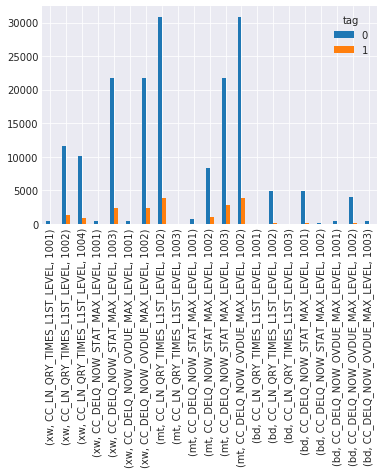

In [47]:
ini.pd.concat(catd,axis=1,keys=['xw','mt','bd']).T.plot.bar()

In [48]:
catd = []
for d in (xwmain,bdmain):
    catd.append(d.groupby(['tag','HOUSE_FUND_MONTH_PAYAMT']).size().unstack())

In [49]:
ini.pd.concat(catd,axis=1,keys=['xw','bd']).to_excel('tz.xlsx')

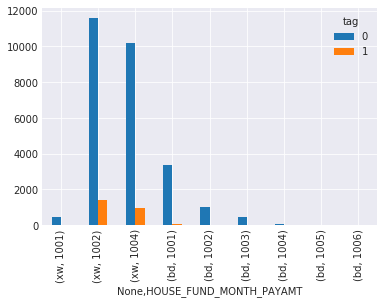

In [50]:
ini.pd.concat(catd,axis=1,keys=['xw','bd']).T.plot.bar(grid=True)

## 2.2 全渠道分析

In [74]:
mtmain = mtmain.drop('CUSTOMER_NO',axis=1).rename({'CERT_NO':'ID_CARD_NO'},axis=1)

In [75]:
comb_main = ini.pd.concat([xwmain,mtmain,bdmain])

In [76]:
# comb_main = comb_main.drop_duplicates('ID_CARD_NO')

In [54]:
comb_main.to_csv('data/all_rest2.csv',index=False)

In [55]:
break

SyntaxError: 'break' outside loop (<ipython-input-55-6aaf1f276005>, line 1)

In [ ]:
feacols = ['CC_LN_QRY_TIMES_L1ST_LEVEL','CC_DELQ_NOW_STAT_MAX_LEVEL','CC_DELQ_NOW_OVDUE_MAX_LEVEL','HOUSE_FUND_MONTH_PAYAMT']
comb_main_cat = ini.pd.concat([comb_main.groupby(['tag',c]).size().unstack() for c in feacols],axis=1,keys=feacols)

In [ ]:
comb_main_cat.to_excel('特征质量分析汇总.xlsx')

In [ ]:
comb_main_cat.T.plot.bar(grid=True)

In [77]:
comb_main.shape

(64267, 6)